# 🐟 Multiclass Fish Image Classification - EDA
This notebook covers the **Exploratory Data Analysis (EDA)** phase for the fish image classification project.  
We will explore the dataset structure, visualize the image distribution across classes, apply data preprocessing using `ImageDataGenerator`, and preview sample and augmented images.

---

## Objectives:
- Understand the dataset structure (train, val, test splits)
- Analyze class balance
- Visualize sample fish images
- Prepare image generators for model training


In [24]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random
import tensorflow as tf
from tensorflow.keras.preprocessing import image




## 🔗 1. Mount Google Drive or Upload ZIP

We begin by accessing the dataset either by:
- Mounting Google Drive (recommended for larger projects)
- Uploading a ZIP file manually (for small experiments)

Choose the appropriate method based on your setup.


In [21]:
from google.colab import files
uploaded = files.upload()



Saving data.zip to data.zip


## 📁 2. Set Up Directory Paths

Once the dataset is available in the environment, we define paths for:
- Training set
- Validation set
- Test set

Each set contains 11 class folders (e.g., "Fish Bass", "Animal Fish").


In [25]:
# Extract the zip into /content
with zipfile.ZipFile("data.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/")








In [26]:
print("✅ Folders inside /content:")
print(os.listdir("/content"))

print("📁 Contents of /content/data:")
print(os.listdir("/content/data"))


✅ Folders inside /content:
['.config', 'data', 'data.zip', 'Dataset (1).zip', 'temp_dataset', 'images.cv_jzk6llhf18tm3k0kyttxz', 'Dataset.zip', 'sample_data']
📁 Contents of /content/data:
['test', 'train', 'val']


In [27]:
# SETTING UP THE DIRECTORY PATH
train_dir = "/content/data/train"
val_dir = "/content/data/val"
test_dir = "/content/data/test"



## 📊 3. Visualize Class Distribution

We count the number of images in each class across the **train**, **val**, and **test** folders, and plot them as bar charts.

This helps identify whether the dataset is **balanced** or if we need to apply class weighting or augmentation later.


/tmp/ipython-input-2377468009.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()), ax=axs[0], palette="viridis")
/tmp/ipython-input-2377468009.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')
/tmp/ipython-input-2377468009.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(val_counts.keys()), y=list(val_counts.values()), ax=axs[1], palette="magma")
/tmp/ipython-input-2377468009.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, 

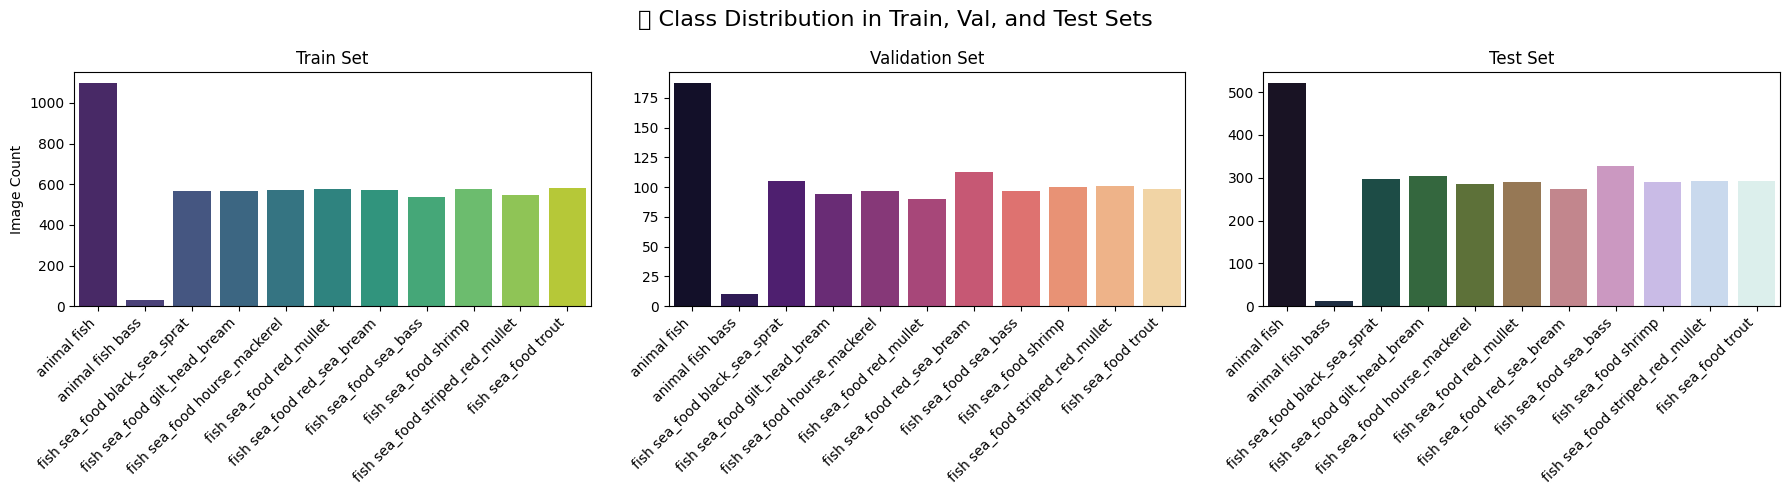

In [29]:


def get_class_counts(directory):
    class_counts = {}
    for class_name in sorted(os.listdir(directory)):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

# Get class-wise image counts
train_counts = get_class_counts(train_dir)
val_counts = get_class_counts(val_dir)
test_counts = get_class_counts(test_dir)

# Plot all three splits
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()), ax=axs[0], palette="viridis")
axs[0].set_title("Train Set")
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')
axs[0].set_ylabel("Image Count")

sns.barplot(x=list(val_counts.keys()), y=list(val_counts.values()), ax=axs[1], palette="magma")
axs[1].set_title("Validation Set")
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right')

sns.barplot(x=list(test_counts.keys()), y=list(test_counts.values()), ax=axs[2], palette="cubehelix")
axs[2].set_title("Test Set")
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=45, ha='right')

plt.suptitle("📊 Class Distribution in Train, Val, and Test Sets", fontsize=16)
plt.tight_layout()
plt.show()


## 🖼️ 4. Show Sample Images from Each Class

Let’s preview a few sample images from each fish class in the training set.  
This gives us a sense of image quality, class diversity, and visual patterns.



Total classes found: 11
Class names: ['animal fish', 'animal fish bass', 'fish sea_food black_sea_sprat', 'fish sea_food gilt_head_bream', 'fish sea_food hourse_mackerel', 'fish sea_food red_mullet', 'fish sea_food red_sea_bream', 'fish sea_food sea_bass', 'fish sea_food shrimp', 'fish sea_food striped_red_mullet', 'fish sea_food trout']


/tmp/ipython-input-2771291652.py:36: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


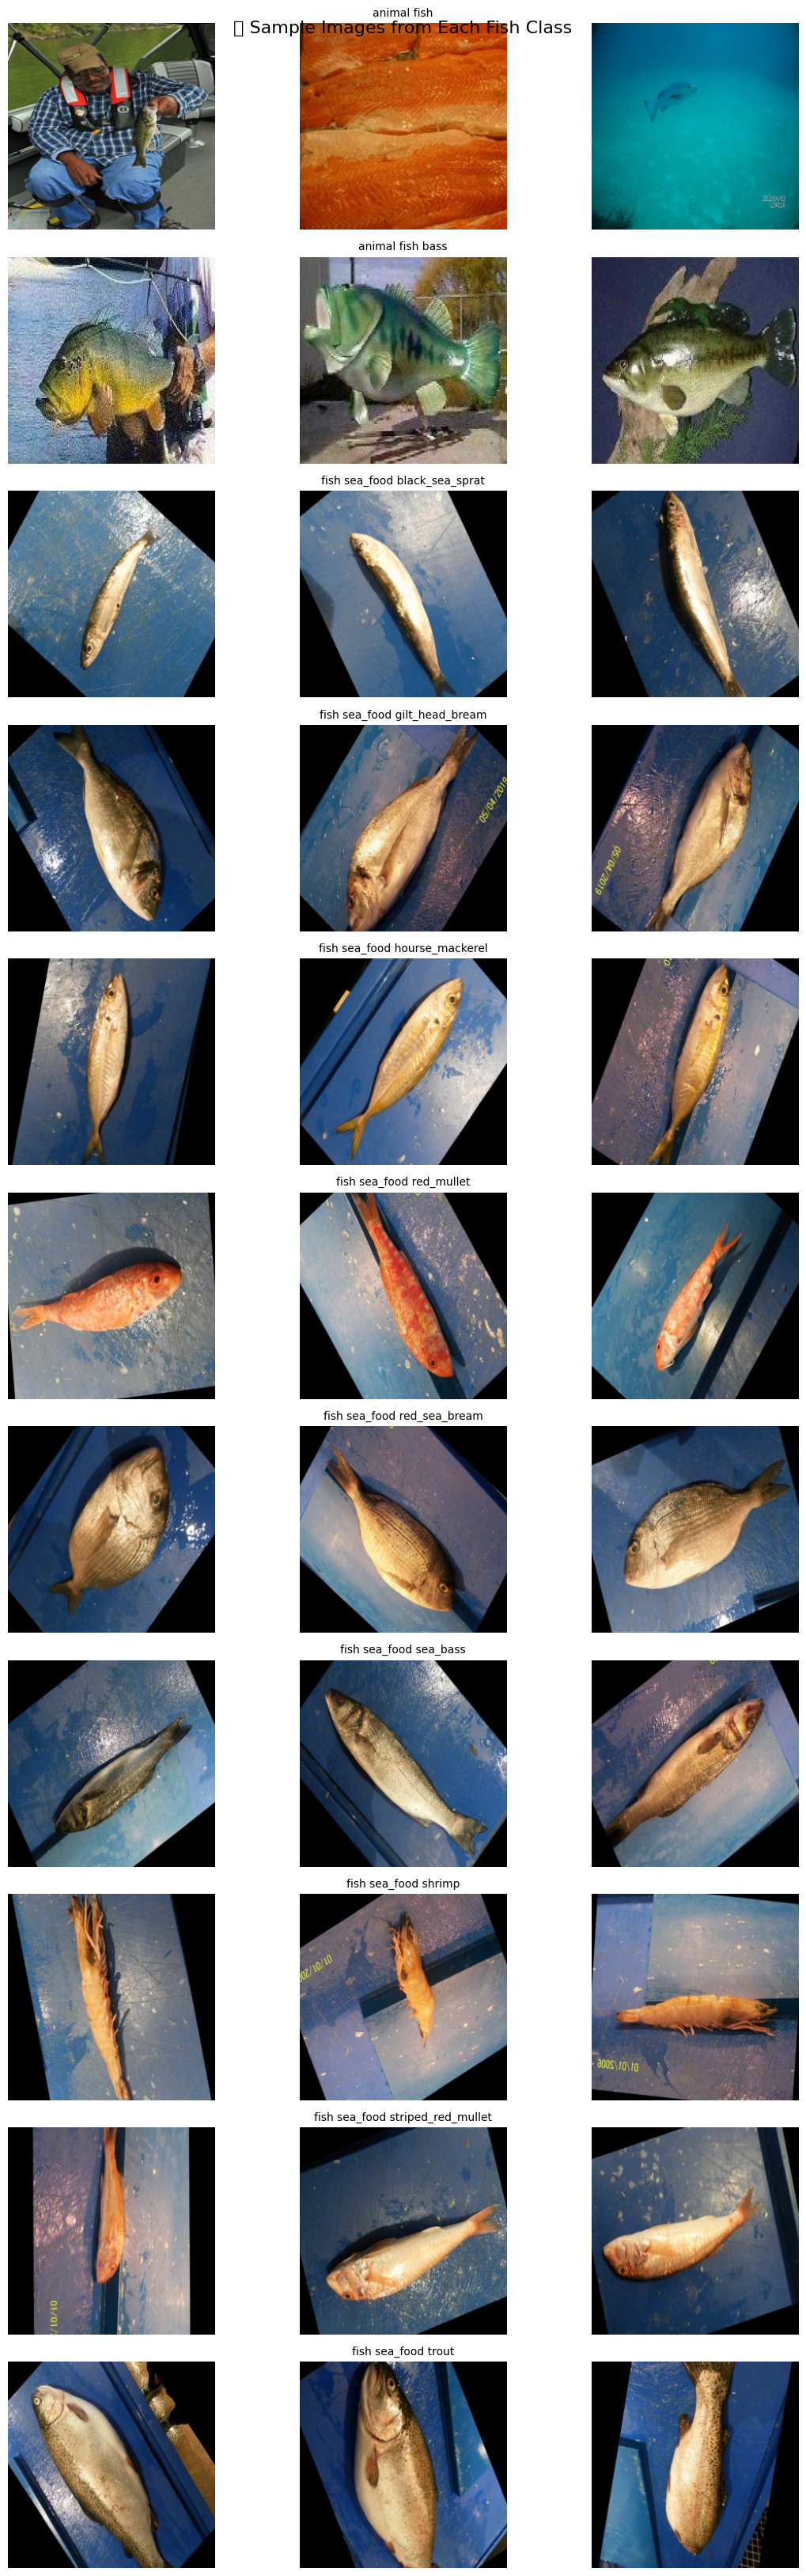

In [33]:

# Automatically fetch class names from training directory
class_names = sorted(os.listdir(train_dir))
print(f"Total classes found: {len(class_names)}")
print("Class names:", class_names)

def show_sample_images(data_dir, class_names, images_per_class=3):
    total_images = len(class_names) * images_per_class
    cols = images_per_class
    rows = len(class_names)

    plt.figure(figsize=(4 * cols, 3 * rows))

    for i, class_name in enumerate(class_names):
        class_path = os.path.join(data_dir, class_name)
        available_images = os.listdir(class_path)

        if not available_images:
            print(f"⚠️ Warning: No images found in class '{class_name}'")
            continue

        sample_images = random.sample(available_images, min(images_per_class, len(available_images)))

        for j, img_name in enumerate(sample_images):
            img_path = os.path.join(class_path, img_name)
            try:
                img = Image.open(img_path).convert("RGB")
                plt.subplot(rows, cols, i * cols + j + 1)
                plt.imshow(img)
                plt.axis("off")
                if j == 1:  # middle image gets class label
                    plt.title(class_name, fontsize=10)
            except Exception as e:
                print(f"❌ Could not load image {img_path}: {e}")

    plt.suptitle("🖼️ Sample Images from Each Fish Class", fontsize=16)
    plt.tight_layout()
    plt.show()

# ✅ Call the function
show_sample_images(train_dir, class_names)




## ⚙️ 5. Prepare ImageDataGenerators

Now we prepare training, validation, and test data loaders using Keras' `ImageDataGenerator`.

Here, we simply **normalize the images to [0, 1]** by using `rescale=1./255`.  
Augmentation will be handled in a later notebook during model training.


In [28]:
import tensorflow as tf
ImageDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_gen = datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.


## 🔍 6. Preview Loaded Image Batches

We use `next()` to grab a batch from the training generator and visualize some loaded images with their class indices.

This acts as a sanity check to ensure data is being read and processed correctly.


/tmp/ipython-input-693492058.py:15: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


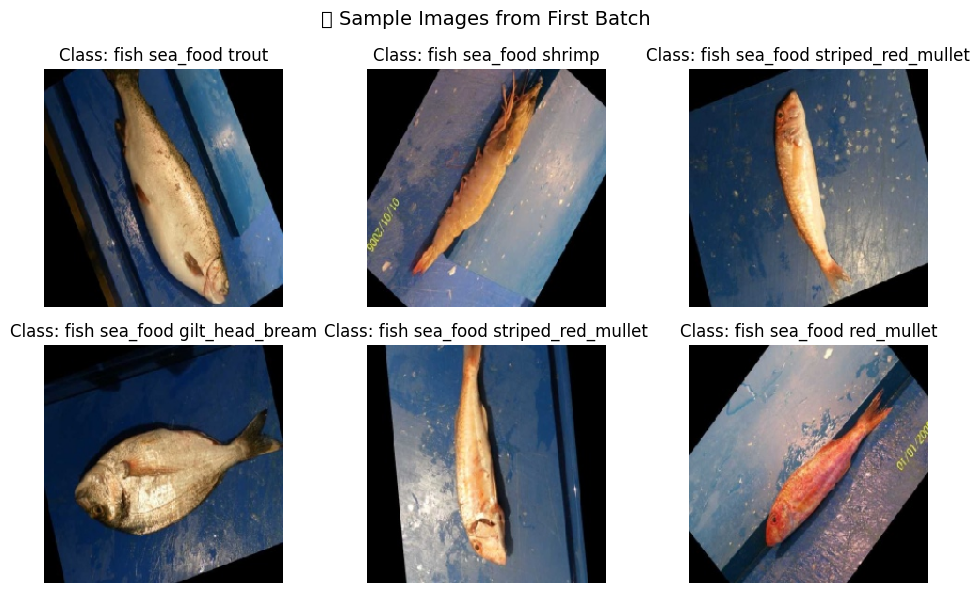

In [34]:

# Get one batch of images and labels
images, labels = next(train_gen)

# Show 6 sample images from the batch
plt.figure(figsize=(10, 6))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i])
    class_index = np.argmax(labels[i])
    class_name = list(train_gen.class_indices.keys())[class_index]
    plt.title(f"Class: {class_name}")
    plt.axis('off')

plt.suptitle("🔍 Sample Images from First Batch", fontsize=14)
plt.tight_layout()
plt.show()


## ✅ 7. Summary

I have:
- Loaded and explored the dataset structure
- Visualized class distributions
- Previewed real sample images from each class
- Prepared training, validation, and test generators


